The aim of this project is to predict the house sales in King County, Washington State, USA using Multiple Linear Regression (MLR). The dataset consists of historic data of houses sold between May 2014 to May 2015.
We will predict the sales of houses in King County and understand which factors are responsible for higher property value - $650K and above.”

The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. The dataset was obtained from Kaggle. 

In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
upload = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [ ]:
df = pd.read_csv('kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


The features mean:

1)id

2)date: Date house was sold(String)

3)price: Price of the sold house

4)bedrooms: Numer of Bedrooms

5)bathrooms: Numer of bathrooms

6)sqft_living: Square footage of the living room

7)sqrt_log: Square footage of the log

8)floors: Total floors in the house

9)waterfront: Whether the house has a view a waterfront(1: yes, 0: not)

10)view: unknown

11)condtion: Condition of the house

12)grade: unknown

13)sqft_above: Square footage of house apart from basement

14)sqft_basement: Square footage of the basement

15)yr_built: Built year

16)yr_renovated: Year when the house was renovated

17)zipcode: zipcode of the house

18)lat: Latitude coordinate

19)long Longitude coordinate

20)sqft_living15: Living room area in 2015(implies some renovations)

21)sqrt_lot15: Lot area in 2015(implies some renovations)

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

##**EDA**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


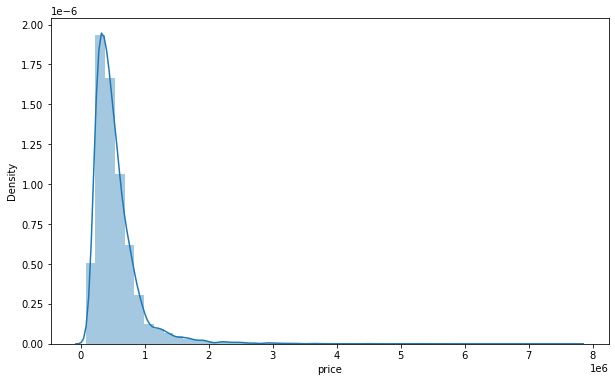

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

Most of the houses are under 1.5 million dollars and the rest are the outliers of the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


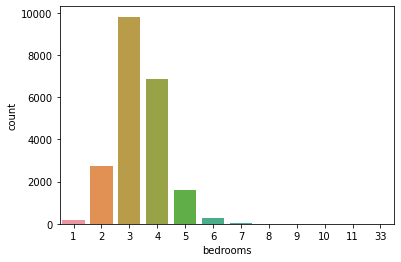

In [ ]:
sns.countplot(df['bedrooms'])

Most of the houses have 2-5 bedrooms 

In [ ]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

Now we will check highly correlated features with price using scatterplots

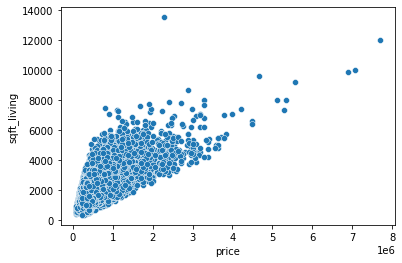

In [ ]:
sns.scatterplot(x='price',y='sqft_living',data=df)

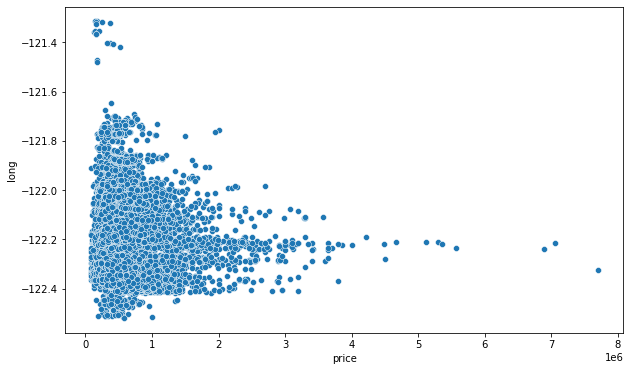

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='long',data=df)

This shows that longitude also has a say in price distribution. For example, at longitude -122.2, the properties are expensive.

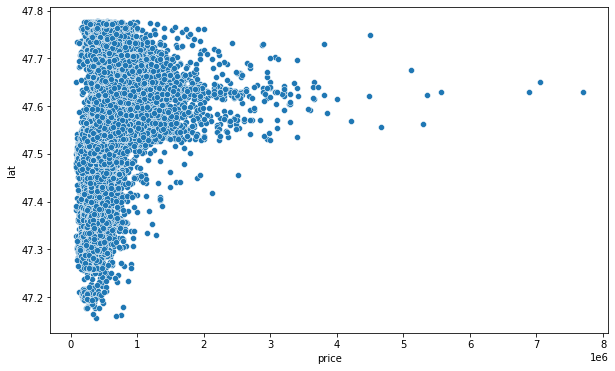

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price',y='lat',data=df)

Same goes for latitude as well so the area where latitude is 47.6 and longitude is -122.2 is a posh area in the county

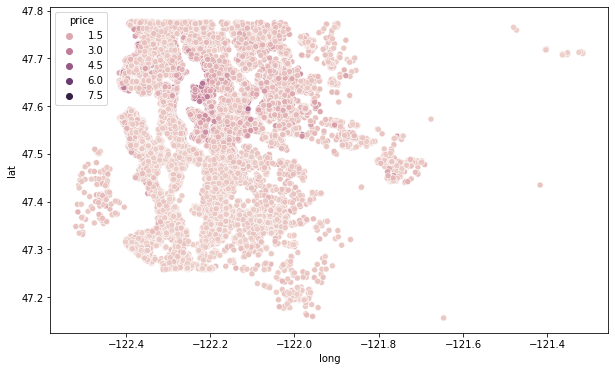

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

This looks like the map of Kings County and we can see the expensive area which we deduced using the earlier scatterplots. But the map is not clean because of the various outliers which we still haven't taken care of.

In [ ]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


The most expensive house is of 7.7 million dollars but after the top few houses, the price gradually moves to around 3-4 million dollars. So now we will make a new dataframe without the top 1 percent houses.

In [ ]:
df1 = df.sort_values('price',ascending=False).iloc[216:]


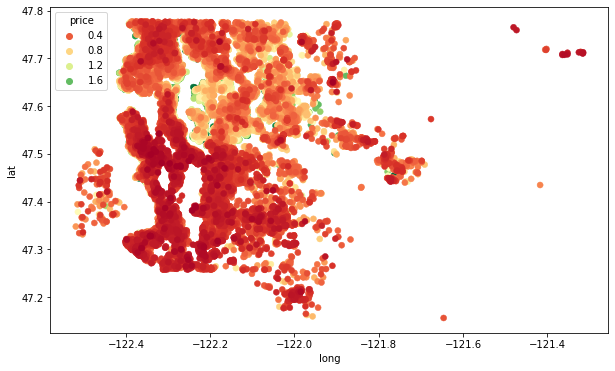

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long',y='lat',data=df1,edgecolor=None,palette='RdYlGn',hue='price')

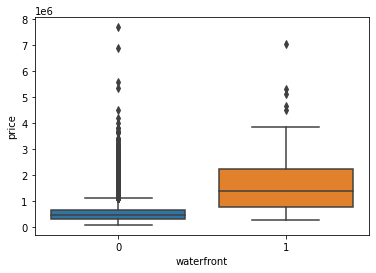

In [ ]:
sns.boxplot(x='waterfront',y='price',data=df)

This shows that the waterfront properties are more expensive which is usually the case due to their scenic nature

In [ ]:
df = df.drop('id',axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We dropped the id column as it doesn't help in any analysis. Since it was mentioned that the date is a string, we will convert it to datetime object

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [ ]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


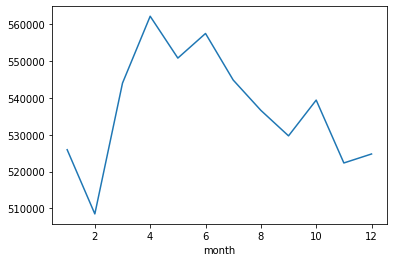

In [ ]:
df.groupby('month').mean()['price'].plot()

There is slight change in different months and the price of the houses 

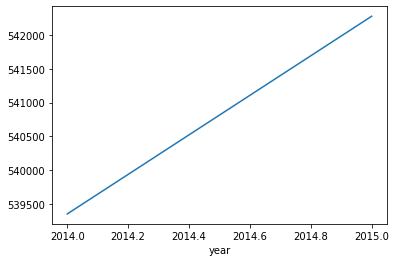

In [ ]:
df.groupby('year').mean()['price'].plot()

This shows a trend of increasing price ranges which is the case because real estate prices seldom drop

In [ ]:
df = df.drop('date',axis=1)

In [ ]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

There are 70 different zipcodes. No use of making dummy variables for 70 categories so we will drop the zipcode column

In [ ]:
df = df.drop('zipcode',axis=1)

In [ ]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

0 means the house was not renovated and the rest different years show the number of houses renovated in a particular year. Since there are many different categories, we will make 2 unique categories of Renovated and Not Renovated

In [ ]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

0 means the house does not have a basement so we will do the same as the above step of making 2 categories of Basement and No Basement

In [ ]:
df['Renovated'] = np.where(df.yr_renovated > 1,1,0)
df['Basement'] = np.where(df.sqft_basement > 1,1,0)
df = df.drop('yr_renovated',axis=1)
df = df.drop('sqft_basement',axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,year,month,Renovated,Basement
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,47.5112,-122.257,1340,5650,2014,10,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,47.7210,-122.319,1690,7639,2014,12,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,47.7379,-122.233,2720,8062,2015,2,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,47.5208,-122.393,1360,5000,2014,12,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,47.6168,-122.045,1800,7503,2015,2,0,0


So we have categorised the houses into having a basement or not and having done a renovation or not

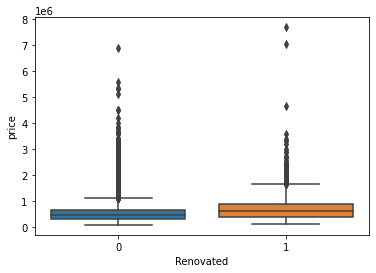

In [ ]:
sns.boxplot(x='Renovated',y='price',data=df)

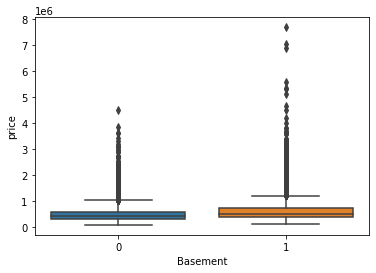

In [ ]:
sns.boxplot(x='Basement',y='price',data=df)

Renovated properties and those with basements tend to have a slightly higher price which is the usual case in real estate.

##**Preprocessing and Model Creation**

In [ ]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X_train.shape

(15117, 19)

In [ ]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 4ms/step - loss: 430225555456.0000 - val_loss: 418827173888.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 427884675072.0000 - val_loss: 410792853504.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 396682428416.0000 - val_loss: 341798486016.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 267610603520.0000 - val_loss: 165277335552.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 121059581952.0000 - val_loss: 95362818048.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 97524457472.0000 - val_loss: 93510582272.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 95801901056.0000 - val_loss: 91927388160.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 94127202304.0000 - val_loss: 90378223616.0000
Epoch 9/400
119/119 [==

##**Model Evaluation and Prediction**

Now we will check whether the model has overfitted or not

In [ ]:
losses = pd.DataFrame(model.history.history)

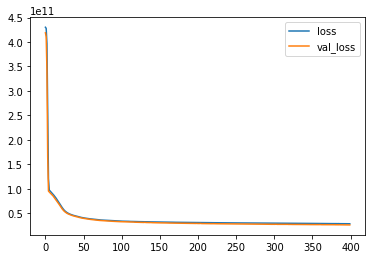

In [ ]:
losses.plot()

There is a decrease in both the losses, that is, training and validation and there is no increase in the validation dataset

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mean_squared_error(y_test,predictions)

26185162222.33924

In [ ]:
rms = np.sqrt(mean_squared_error(y_test,predictions))
print(rms)

161818.3000230173


In [ ]:
mean_absolute_error(y_test,predictions)

99866.20362533757

This is not a good score as we are off by nearly 20% from the mean price of properties

In [ ]:
explained_variance_score(y_test,predictions)

0.8025787438446869

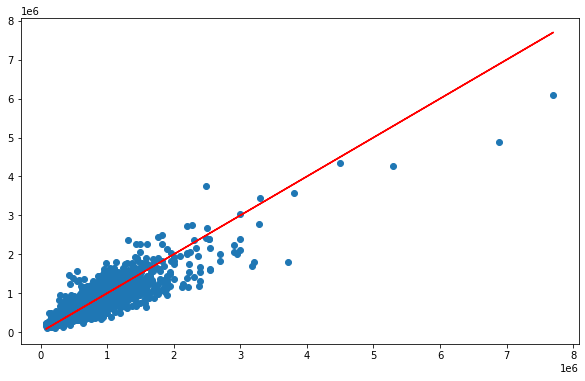

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

Red line is the perfect fit but the model is not good due to the outliers present